In [ ]:
import numpy as np
from numpy import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class network_Layer:
    def forward(self, k):
        raise NotImplementedError()
    def backward(self, output, lr):
        raise NotImplementedError()

In [ ]:
class Linearity(network_Layer):
    def __init__(self, in_size, out_size):
        self.weights = random.randn(out_size, in_size) * np.sqrt(1/in_size)
        self.bias = random.randn(out_size, 1) * np.sqrt(1/in_size)

    def forward(self, x):
        self.x = x
        return self.weights @ x + self.bias

    def backward(self, output, lr):
        new_output = self.weights.T @ output
        grad_w = output @ self.x.T
        grad_b = np.mean(output, axis=1).reshape(-1,1)

        self.weights -= lr * grad_w
        self.bias -= lr * grad_b

        return new_output

In [ ]:
class RelU(network_Layer):
    def __init__(self):
        None
    def forward(self, x):
        self.x = x
        return np.maximum(x,0)
    def backward(self, output, lr):
        Relu_prime = (self.x > 0).astype(int)
        return np.multiply(Relu_prime, output)

In [ ]:
class mean_squared_error:
    def loss(self, y, y_true):
        return np.mean((y-y_true)**2)

    def loss_grad(self, y, y_true):
        no_classes = y.shape[0]
        no_datapoints = y.shape[1]
        return (2/(no_classes*no_datapoints)) * (y-y_true)

In [ ]:
def calculate_accuracy(y_pred, y_true):
    pred_labels = np.argmax(y_pred, axis=0)
    true_labels = np.argmax(y_true, axis=0)
    return np.mean(pred_labels == true_labels)

In [ ]:
class NN:
    def __init__(self, x, y, layers_dim, lr, max_iterations, activation=RelU, loss=mean_squared_error):
        self.x = x.T
        self.y = y.T
        self.loss = loss
        self.lr = lr
        self.max_iterations = max_iterations
        self.network = []
        self.initialize_network(layers_dim, activation)

    def initialize_network(self, layers_dim, activation):
        assert layers_dim[0] == self.x.shape[0], f"your input layer has to be of the size {self.x.shape[0]}"
        assert layers_dim[-1] == self.y.shape[0], f"your output layer has to be of the size {self.y.shape[0]}"

        for i in range(len(layers_dim) - 1):
            self.network.extend(
                [ Linearity(layers_dim[i], layers_dim[i+1]), activation() ] )

    def forward(self):
        output = self.x
        for layer in self.network:
            output = layer.forward(output)

        return output

    def backward(self, y_pred):
        out_grad = self.loss.loss_grad(self, y_pred, self.y)
        for layer in reversed(self.network):
            out_grad = layer.backward(out_grad, self.lr)


    def train(self) :
        for epoch in range(self.max_iterations):
            y_pred = self.forward()
            loss = self.loss.loss(self, y_pred, self.y)
            acc = calculate_accuracy(y_pred, self.y)
            self.backward(y_pred)
            print(f"Epoch {epoch}/{self.max_iterations}: Loss = {loss}, acc = {acc*100:.2f}%")

    def predict(self, x):
        output = x
        for layer in self.network:
            output = layer.forward(output)
        return output

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist
mnist_dataset = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X = mnist_dataset[0][0].reshape(60000, 784) / 255
y = mnist_dataset[0][1]
y_one_hot = np.eye(10)[y]

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized = X_train_normalized
X_test_normalized = X_test_normalized.T
y_train = y_train
y_test = y_test.T

layers_dim = [784,64,10]
learning_rate = 0.6
activation_layer = RelU
loss = mean_squared_error

nn = NN(X_train_normalized, y_train, layers_dim, learning_rate, 400, activation_layer, loss)
nn.train()
y_pred = nn.predict(X_test_normalized)

accuracy = calculate_accuracy(y_pred, y_test)



Epoch 0/400: Loss = 0.22627227845504777, acc = 9.57%
Epoch 1/400: Loss = 0.11925716520222167, acc = 20.52%
Epoch 2/400: Loss = 0.10194211320098967, acc = 26.80%
Epoch 3/400: Loss = 0.09291756467281624, acc = 31.09%
Epoch 4/400: Loss = 0.08685089507183837, acc = 34.91%
Epoch 5/400: Loss = 0.08213505568424272, acc = 38.46%
Epoch 6/400: Loss = 0.0781386750983041, acc = 41.97%
Epoch 7/400: Loss = 0.07453367913746584, acc = 45.28%
Epoch 8/400: Loss = 0.07119300313788922, acc = 48.38%
Epoch 9/400: Loss = 0.06808134503807162, acc = 51.32%
Epoch 10/400: Loss = 0.06521866279587303, acc = 53.87%
Epoch 11/400: Loss = 0.06266483485424325, acc = 56.12%
Epoch 12/400: Loss = 0.060391495078754985, acc = 58.20%
Epoch 13/400: Loss = 0.058326235527931446, acc = 59.87%
Epoch 14/400: Loss = 0.056432409509882465, acc = 61.57%
Epoch 15/400: Loss = 0.0546685826360884, acc = 63.06%
Epoch 16/400: Loss = 0.05305666686662607, acc = 64.38%
Epoch 17/400: Loss = 0.05160012648111658, acc = 65.56%
Epoch 18/400: Loss =

In [ ]:
print(f"Accuracy of test: {accuracy * 100:.2f}%")

Accuracy of test: 93.22%


Confusion matrix

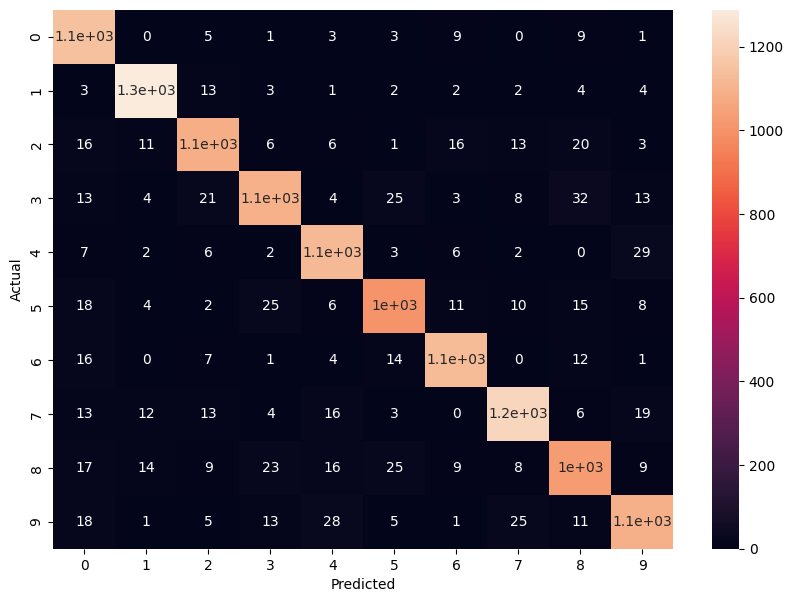

In [ ]:
y_pred = np.argmax(y_pred, axis=0)
y_test = np.argmax(y_test, axis=0)
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()